In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [55]:
initial_heights = np.array([
    0.804, 0.804, 0.8, 0.807, 0.802,
    0.561, 0.557, 0.563, 0.561, 0.55,
    0.741, 0.739, 0.745, 0.742,
    0.763, 0.76, 0.769, 0.763, 0.761,
    0.428, 0.431,
    0.804, 0.807, 0.8, 0.8, 0.801, 0.673, 0.804, 0.804, 0.807, 0.415, 0.804
])

final_heights = np.array([
    1.848, 1.815, 1.867, 1.865, 1.7907,
    1.312, 1.23, 1.226, 1.283, 1.31,
    1.695, 1.65, 1.675, 1.65,
    1.811, 1.699, 1.775, 1.721, 1.719,
    0.957, 0.964,
    1.9566144, 2.0401767, 1.97192, 2.12552, 2.2072356, 1.72288, 2.1624384, 2.1361476, 2.0918247, 1.1026135, 1.93161
])

change_in_heights = final_heights - initial_heights

separation_distances = np.array([
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0,
    19, 14, 6, 29, 53, 18, 36, 39, 27, 25, 5
]) / 1000


<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Aarya\AppData\Local\Temp\ipykernel_26928\2040860986.py:33: SyntaxWarning: invalid escape sequence '\D'
  plt.colorbar(label='$\Delta h$ / m')


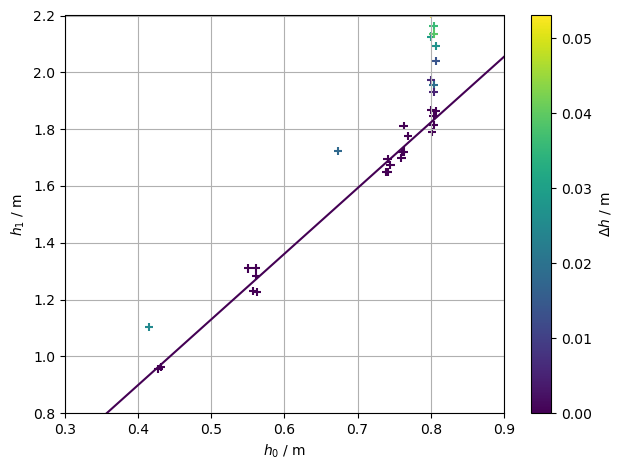

In [99]:
no_sep_initial_heights = np.array([
    0.804, 0.804, 0.8, 0.807, 0.802,
    0.561, 0.557, 0.563, 0.561, 0.55,
    0.741, 0.739, 0.745, 0.742,
    0.763, 0.76, 0.769, 0.763, 0.761,
    0.428, 0.431,
])
no_sep_final_heights = np.array([
    1.848, 1.815, 1.867, 1.865, 1.7907,
    1.312, 1.23, 1.226, 1.283, 1.31,
    1.695, 1.65, 1.675, 1.65,
    1.811, 1.699, 1.775, 1.721, 1.719,
    0.957, 0.964,
])

tx = no_sep_initial_heights
ty = no_sep_final_heights

xlims = (0.3, 0.9)
ylims = (0.8, 2.2)

x = initial_heights
y = final_heights
z = separation_distances

plt.scatter(x, y, c=z, cmap='viridis', marker='+')

plt.xlim(xlims)
plt.ylim(ylims)

plt.xlabel('$h_0$ / m')
plt.ylabel('$h_1$ / m')
plt.colorbar(label='$\Delta h$ / m')

# Create trendline through just points with no separation

m, b = np.polyfit(tx, ty, 1)
plt.plot(xlims, [m*x + b for x in xlims], color='#440154')


plt.grid(True)
plt.show()

In [ ]:
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(initial_heights, separation_distances, final_heights, c=final_heights, cmap='viridis')

# Fit surface equation (as an example, replace with your actual equation)
def surface_equation(h0, dx):
    return (2.15 * h0) * (0.01 * np.log(dx + 1) + 0.977)**4 + 0.23

# Generate data for the surface
h0_range = np.linspace(min(initial_heights), max(initial_heights), 30)
dx_range = np.linspace(min(separation_distances), max(separation_distances), 30)
h0_mesh, dx_mesh = np.meshgrid(h0_range, dx_range)
h1_surface = surface_equation(h0_mesh, dx_mesh)

# Plot the surface
ax.plot_surface(h0_mesh, dx_mesh, h1_surface, cmap='viridis', alpha=0.7, edgecolor='none')

ax.view_init(elev=30, azim=120)  # Adjust this to position h_1 axis on the left
# Move the z-axis label (h_1) to the left
ax.zaxis.set_rotate_label(False)  # Prevent automatic rotation
ax.zaxis.labelpad = 10  # Adjust distance from the axis
ax.zaxis.set_label_coords(-0.1, 0.5)  # Move label to the left (x-coord) and center (y-coord)


# Labels and customization
ax.set_xlabel('$h_0$ / m')
ax.set_ylabel('$\Delta h$ / m')
ax.set_zlabel('$h_1$ / m')
fig.colorbar(sc, ax=ax, label='$h_1$')
plt.show()


In [ ]:
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(initial_heights, separation_distances, final_heights, c=separation_distances, cmap='viridis')

# Define a new surface equation for fitting
def surface_function(data, a, b, c, d):
    h0, dx = data
    return a * h0 + b * np.log(dx + 1) + c * h0 * np.log(dx + 1) + d

# Prepare the data for fitting
h0_dx = np.vstack((initial_heights, separation_distances))  # Stack h0 and dx as rows
popt, _ = curve_fit(surface_function, h0_dx, final_heights, p0=[1, 1, 1, 1])

# Generate the improved surface
h0_range = np.linspace(min(initial_heights), max(initial_heights), 50)
dx_range = np.linspace(min(separation_distances), max(separation_distances), 50)
h0_mesh, dx_mesh = np.meshgrid(h0_range, dx_range)
h1_surface = surface_function((h0_mesh, dx_mesh), *popt)

# Plot the improved surface
ax.plot_surface(h0_mesh, dx_mesh, h1_surface, cmap='viridis', alpha=0.7, edgecolor='none')

# Adjust the view angle
ax.view_init(elev=30, azim=140)

# # Move the z-axis label ($h_1$) to the left
# ax.zaxis.set_rotate_label(False)  # Prevent automatic rotation
# ax.zaxis.labelpad = 15  # Adjust distance from the axis
# ax.zaxis.set_label_coords(-0.3, 0.5)  # Move label further left (x-coord) and keep centered (y-coord)

# Set labels and customization
ax.set_xlabel('$h_0$ / m')
ax.set_ylabel('$\\Delta h$ / m')
ax.set_zlabel('$h_1$ / m')

# Add colorbar
cbar = fig.colorbar(sc, ax=ax, pad=0.1, shrink=0.73)  # Add padding to separate the colorbar
cbar.set_label('$\Delta h / m$')

# Adjust layout to avoid overlapping
plt.subplots_adjust(left=0.2, right=0.8)  # Add more space on the left and right sides

# plt.tight_layout()  # Adjust subplots to fit into the figure

plt.show()
